In [ ]:
'''
Clasificador de gestos de la mano según la actividad muscular.

La actividad es la señal recibidad por un censor de EMG (Electromiografía).

El dataset está compuesto por la señales emitidas por cada uno de los 8 sensores (variables independientes) 
y los gestos con los que corresponde (variable dependiente).

Cada fila del dataset tiene 8 lecturas consecutivas de los 8 sensores para cada movimiento.
Por lo tanto cada record se compone de 64 columnas y una, la última, 
se corresponde con el gesto(label de 0 a 3).

Crearemos un clasificador para que dadas 64 señales podamos predecir un gesto:

    # 0 es piedra.
    # 1 es tijeras.
    # 2 es papel.
    # 3 es ok.
    '''

In [2]:
# Importación de librerías:

import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Como los csvs originales no contienen un header, creamos los nombres de las columnas:

columns = ['activity_' +  str(i) for i in range(1, 65)]
columns.append('gesture')

In [4]:
# Cargamos los csv que forman el dataset:

gesture_0 = pd.read_csv('./data/0.csv', names = columns)
gesture_1 = pd.read_csv('./data/1.csv', names = columns)
gesture_2 = pd.read_csv('./data/2.csv', names = columns)
gesture_3 = pd.read_csv('./data/3.csv', names = columns)

In [5]:
# Comprobamos las dimensiones de cada uno de los dataframes.
display(gesture_0.shape)
display(gesture_1.shape)
display(gesture_2.shape)
display(gesture_3.shape)

(2910, 65)

(2903, 65)

(2943, 65)

(2922, 65)

In [6]:
#Comprobamos cada uno de los dataframe.

display(gesture_0.head())
display(gesture_1.head())
display(gesture_2.head())
display(gesture_3.head())

,activity_1,activity_2,activity_3,activity_4,activity_5,activity_6,activity_7,activity_8,activity_9,activity_10,...,activity_56,activity_57,activity_58,activity_59,activity_60,activity_61,activity_62,activity_63,activity_64,gesture
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


,activity_1,activity_2,activity_3,activity_4,activity_5,activity_6,activity_7,activity_8,activity_9,activity_10,...,activity_56,activity_57,activity_58,activity_59,activity_60,activity_61,activity_62,activity_63,activity_64,gesture
0,-7.0,-1.0,-1.0,0.0,-10.0,-10.0,-1.0,1.0,-5.0,-5.0,...,6.0,-4.0,-3.0,-5.0,-3.0,15.0,11.0,-4.0,-5.0,1
1,-6.0,-2.0,-5.0,-2.0,27.0,42.0,3.0,5.0,11.0,1.0,...,2.0,-17.0,-5.0,-7.0,-2.0,15.0,12.0,0.0,-7.0,1
2,5.0,0.0,-1.0,-2.0,2.0,-9.0,1.0,5.0,1.0,-3.0,...,-11.0,-23.0,1.0,-1.0,-1.0,-23.0,-25.0,2.0,-1.0,1
3,31.0,4.0,2.0,-2.0,38.0,14.0,2.0,7.0,-2.0,4.0,...,-4.0,13.0,2.0,-1.0,-3.0,-7.0,0.0,-3.0,-2.0,1
4,-4.0,-4.0,3.0,3.0,-25.0,-46.0,-1.0,3.0,-7.0,-6.0,...,15.0,4.0,-4.0,-1.0,-1.0,7.0,26.0,3.0,-7.0,1


,activity_1,activity_2,activity_3,activity_4,activity_5,activity_6,activity_7,activity_8,activity_9,activity_10,...,activity_56,activity_57,activity_58,activity_59,activity_60,activity_61,activity_62,activity_63,activity_64,gesture
0,4.0,19.0,-9.0,-7.0,-3.0,-36.0,-6.0,-23.0,3.0,-21.0,...,9.0,-14.0,-2.0,-3.0,-4.0,-21.0,7.0,-8.0,-12.0,2
1,-1.0,12.0,20.0,7.0,20.0,-73.0,-4.0,-2.0,4.0,5.0,...,-3.0,-5.0,-2.0,0.0,-4.0,-7.0,5.0,6.0,9.0,2
2,4.0,5.0,-8.0,-2.0,10.0,-10.0,-10.0,16.0,-3.0,-18.0,...,2.0,0.0,2.0,3.0,-8.0,19.0,20.0,0.0,-8.0,2
3,-3.0,-3.0,5.0,11.0,25.0,-20.0,-2.0,14.0,9.0,32.0,...,15.0,-2.0,16.0,6.0,9.0,1.0,31.0,16.0,4.0,2
4,-5.0,-9.0,-2.0,-5.0,-46.0,-34.0,-9.0,-4.0,0.0,8.0,...,-5.0,-11.0,-6.0,7.0,6.0,-10.0,-24.0,-6.0,0.0,2


,activity_1,activity_2,activity_3,activity_4,activity_5,activity_6,activity_7,activity_8,activity_9,activity_10,...,activity_56,activity_57,activity_58,activity_59,activity_60,activity_61,activity_62,activity_63,activity_64,gesture
0,-22.0,-9.0,-6.0,-1.0,21.0,26.0,-2.0,5.0,5.0,0.0,...,-10.0,-15.0,-6.0,-3.0,3.0,20.0,25.0,1.0,1.0,3
1,-7.0,0.0,1.0,0.0,-13.0,-18.0,0.0,-9.0,-6.0,-2.0,...,-1.0,11.0,-4.0,-5.0,-4.0,3.0,-8.0,-7.0,-3.0,3
2,-6.0,-6.0,-6.0,-8.0,25.0,43.0,-4.0,7.0,6.0,1.0,...,3.0,2.0,1.0,3.0,-1.0,1.0,9.0,4.0,4.0,3
3,2.0,1.0,1.0,1.0,0.0,-23.0,2.0,-6.0,-1.0,-2.0,...,16.0,-3.0,-1.0,-1.0,-3.0,0.0,-3.0,4.0,3.0,3
4,0.0,3.0,4.0,5.0,1.0,25.0,-9.0,0.0,0.0,1.0,...,1.0,6.0,2.0,1.0,-3.0,-20.0,-42.0,-4.0,2.0,3


In [7]:
# Unimos todo los dataframes en uno.
gesture_0 = gesture_0[:2900]
gesture_1 = gesture_1[:2900]
gesture_2 = gesture_2[:2900]
gesture_3 = gesture_3[:2900]
gestures = pd.concat([gesture_0, gesture_1, gesture_2, gesture_3])
gestures.head()

,activity_1,activity_2,activity_3,activity_4,activity_5,activity_6,activity_7,activity_8,activity_9,activity_10,...,activity_56,activity_57,activity_58,activity_59,activity_60,activity_61,activity_62,activity_63,activity_64,gesture
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [8]:
# Comprobamos que todos los valores sean numéricos.

gestures.dtypes
gesture_3['gesture'].value_counts()
gestures.shape


(11600, 65)

In [9]:
# Comprobamos que la cantidad de valores nulos.

(gestures.isnull().sum() != 0).sum()

0

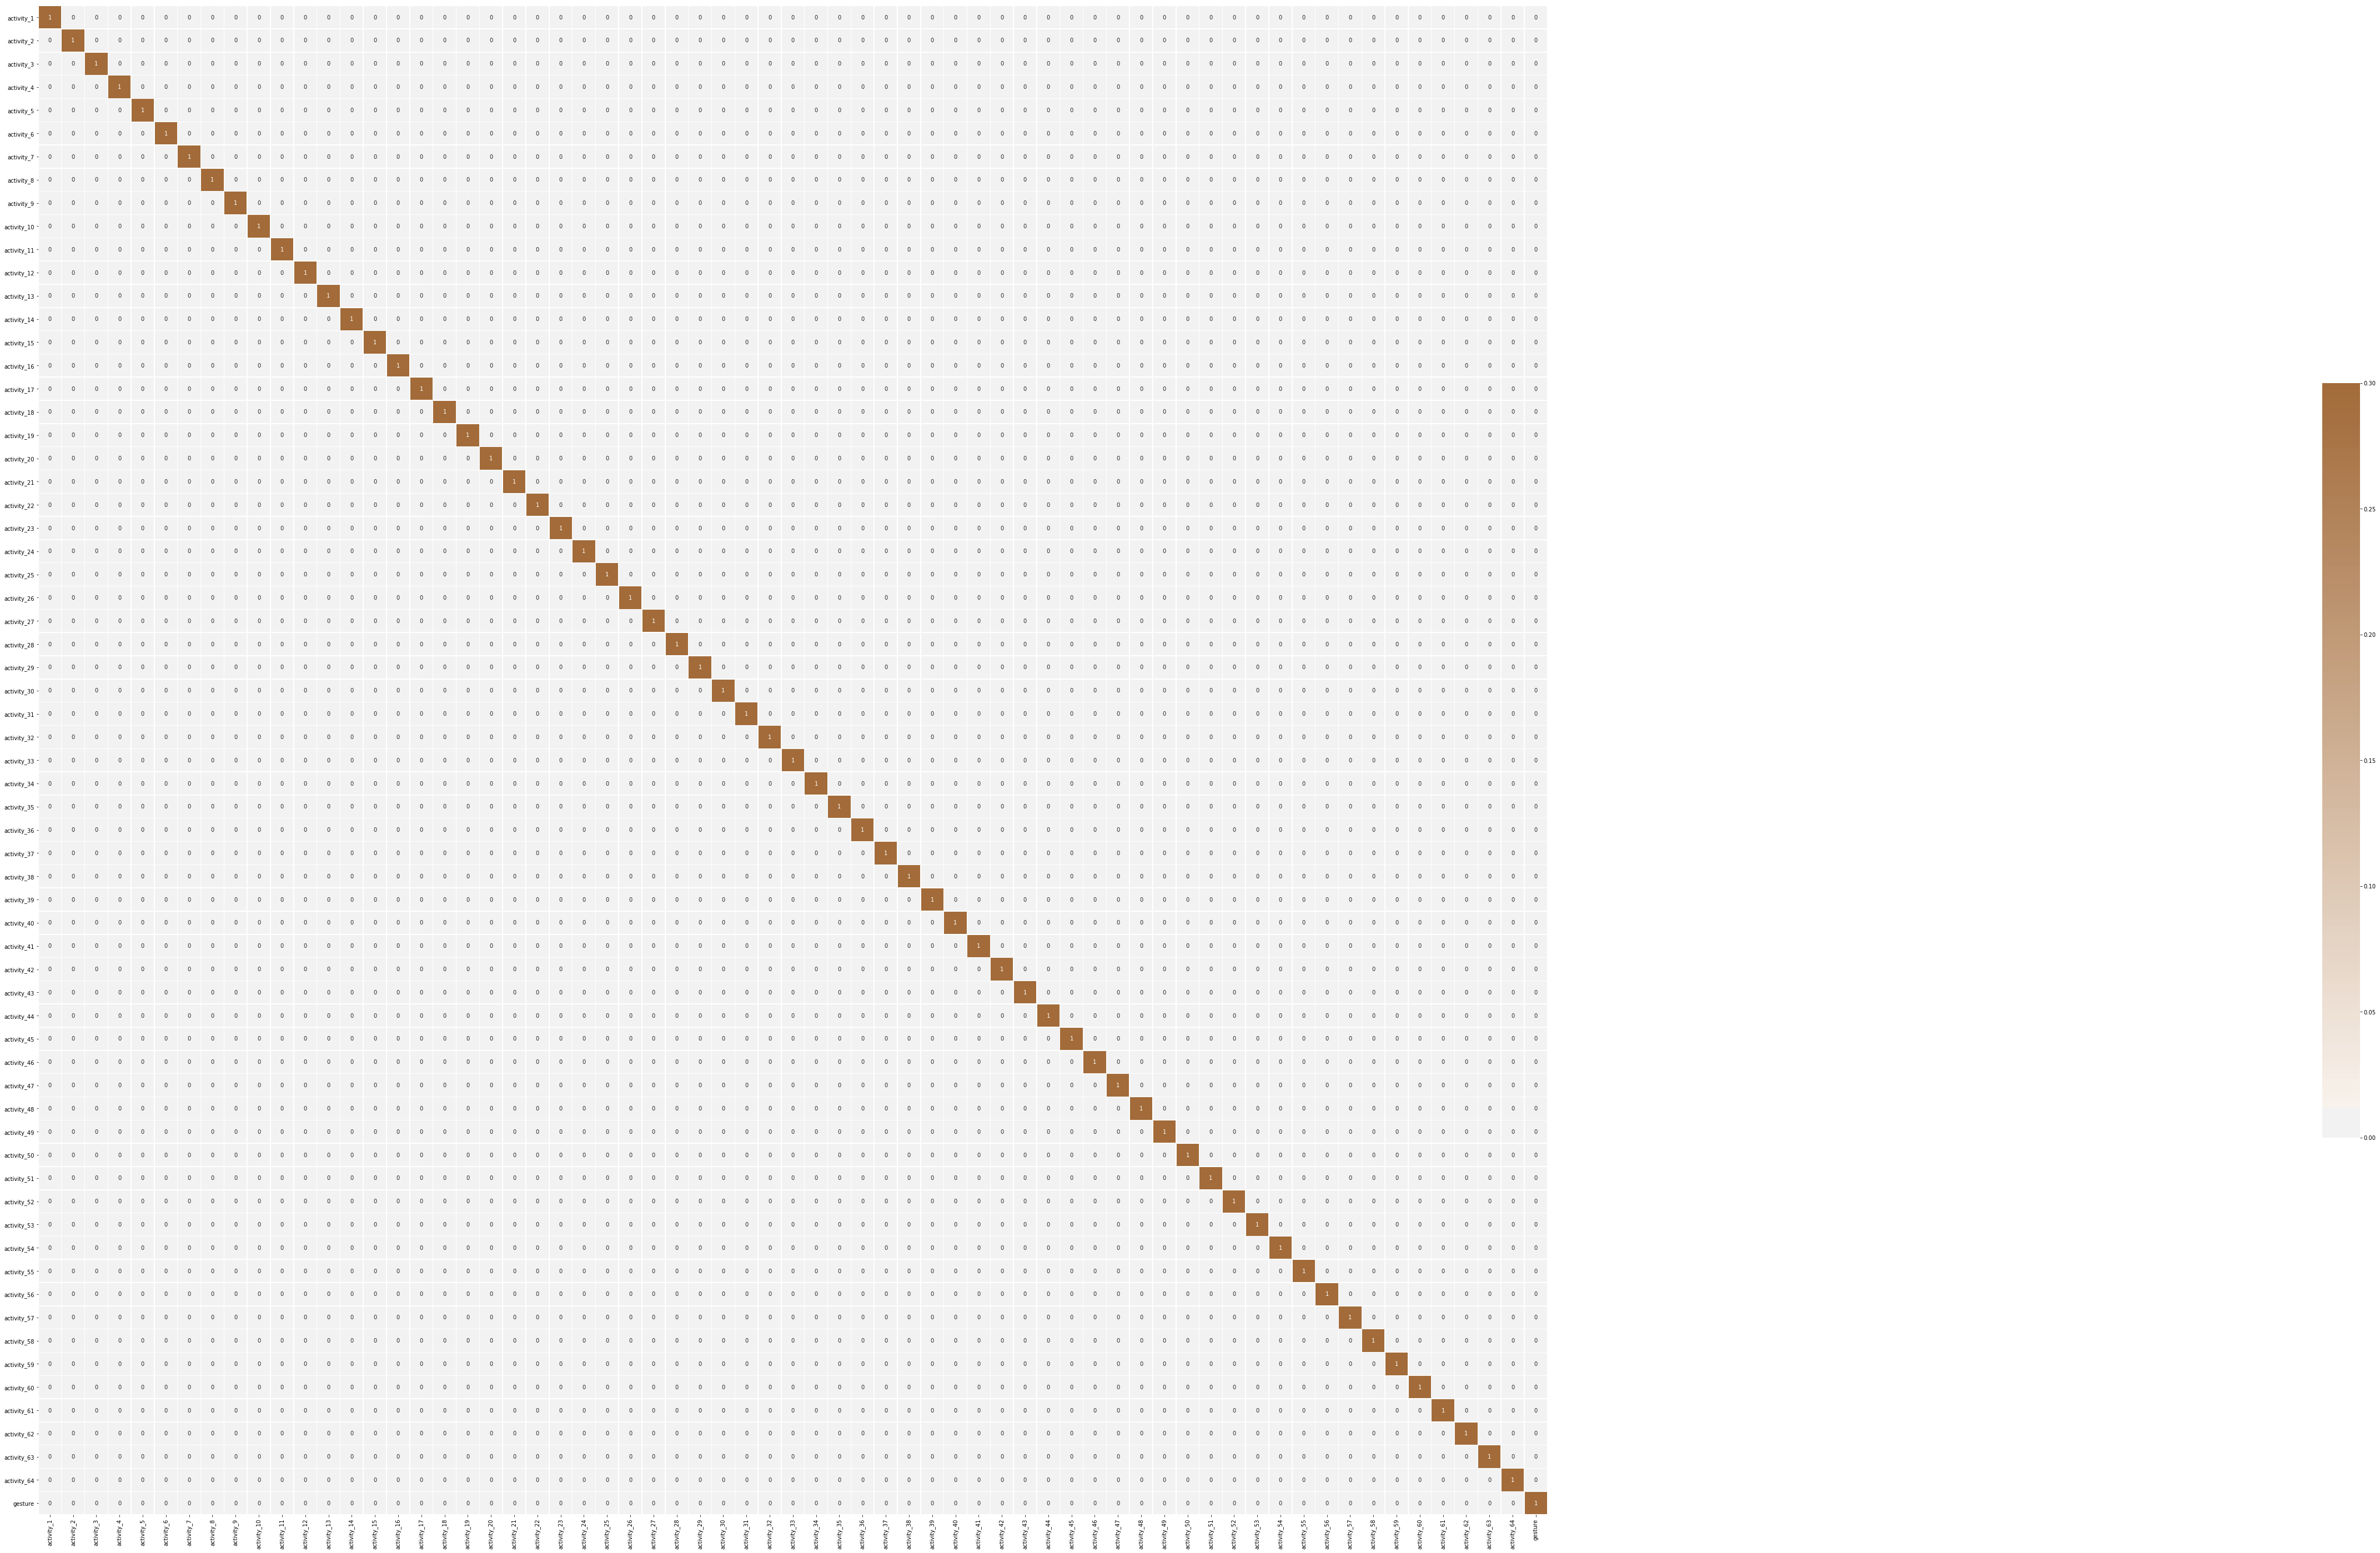

In [10]:
# Comprobamos correlaciones entre las distintas features y confirmamos que no debemos eliminar ninguna.
corr_significativa = gestures.corr() >= 0.9
corr_significativa

f, ax = plt.subplots(figsize=(500, 50))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(300, 40, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_significativa, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)


In [11]:
# Conversión de datos categóricos.
# Como explicamos al principio, en la columna gestures los siguientes valores corresponde con los gestos
# de la mano:    
    # 0 es piedra.
    # 1 es tijeras.
    # 2 es papel.
    # 3 es ok.
# Por lo tanto, modificamos los valores, por la label correspondiente.
    
gestures['gesture'].loc[(gestures['gesture']==0)] = 'piedra'
gestures['gesture'].loc[(gestures['gesture']==1)] = 'tijeras'
gestures['gesture'].loc[(gestures['gesture']==2)] = 'papel'
gestures['gesture'].loc[(gestures['gesture']==3)] = 'ok'


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
# Comprobamos los valores por columna y comprobamos que las labels están balanceadas.

gestures.gesture.value_counts()

papel      2900
ok         2900
piedra     2900
tijeras    2900
Name: gesture, dtype: int64

In [13]:
# Importamos las librerías necesarias para el entrenamiento y clasificación
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_fscore_support


In [22]:
# Creamos X e y

X_columns = gestures.columns[:-1]

X = gestures[X_columns]
y = gestures['gesture']
#y = label_binarize(y, classes=['piedra', 'tijeras', 'papel', 'ok'])

# Realizamos el train / test split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [23]:
# Primero realizaremos la clasificación con KNN
# Generamos el modelo.

# Creamos el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenamos el modelo usando el training set
knn.fit(X_train, y_train)

# Realizamos la predinct con el target set
y_pred_knn = knn.predict(X_test)

from sklearn import metrics

# Calculamos el accuracy del modelo

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

Accuracy: 0.6853448275862069


In [24]:
# El segundo método elegido será RandomForestClassifier
# Generamos el modelo.

# Creamos el clasificador RandomForestClassifier
clf = RandomForestClassifier()

# Entrenamos el modelo usando el training set
clf.fit(X_train, y_train)

# Realizamos la predinct con el target set
y_pred_RF = clf.predict(X_test)

# Calculamos el accuracy del modelo

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RF))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.8913793103448275


In [25]:
# Precision, recall y fscore de knn

display(precision_recall_fscore_support(y_test, y_pred_knn))

# Precision, recall y fscore de Random Forest

display(precision_recall_fscore_support(y_test, y_pred_RF))

(array([0.54747226, 0.81512605, 0.9962406 , 0.6048951 ]),
 array([0.81318681, 0.16987741, 0.85483871, 0.89022298]),
 array([0.65438467, 0.28115942, 0.92013889, 0.7203331 ]),
 array([546, 571, 620, 583]))

(array([0.81675393, 0.88285229, 0.92663477, 0.93973635]),
 array([0.85714286, 0.91068301, 0.93709677, 0.85591767]),
 array([0.83646113, 0.89655172, 0.93183641, 0.89587074]),
 array([546, 571, 620, 583]))

In [18]:
# Función para la ROC Curve

def plotMetricsCompare(X, y, cls1, cls2):
    y_pred_proba = cls1.predict_proba(X)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
    auc = metrics.roc_auc_score(y, y_pred_proba)
    
    y_pred_proba1 = cls2.predict_proba(X)[::,1]
    fpr1, tpr1, _ = metrics.roc_curve(y,  y_pred_proba1)
    auc1 = metrics.roc_auc_score(y, y_pred_proba1)

    plt.title("AUC Model 1: {:2f} AUC Model 2: {:2f}".format(auc, auc1))
    plt.plot(fpr,tpr)
    plt.plot(fpr1,tpr1)
    plt.legend(["Model 1", "Model 2"])



In [19]:
# Ejecutamos la función para generar la AUC comparada de ambos modelos
plotMetricsCompare(X, y, knn, clf)

TypeError: list indices must be integers or slices, not tuple

In [26]:
# Creamos la función para generar la confusion matrix 

def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    La normalización puede ser aplicada estableciendo 'normalize = True'.
    
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Genera la confusion matrix
    
    cm = confusion_matrix(y_test, y_pred)
    
    # Señalamos que solo nos interesan las labels que aparecen en los datos.
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Label real',
           xlabel='Label predicha')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

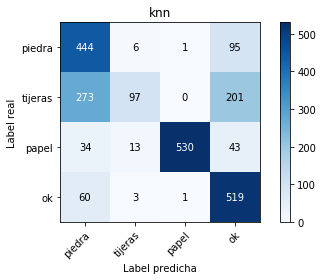

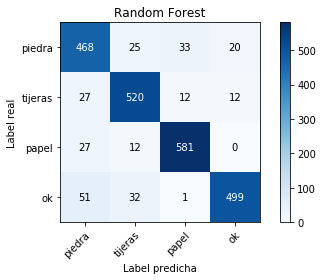

In [27]:
# Ejecutamos la función para generar la confusion matrix de cada modelo

display(plot_confusion_matrix(y_test, y_pred_knn, ['piedra', 'tijeras', 'papel', 'ok'], title='knn'))

display(plot_confusion_matrix(y_test, y_pred_RF, ['piedra', 'tijeras', 'papel', 'ok'], title='Random Forest'))